In [1]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
plt.rcParams['figure.figsize'] = [5, 5]
pd.set_option('display.max_columns', None)
# model explainability use case
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
from lime.lime_tabular import LimeTabularExplainer
import shap

In [2]:
df = pd.read_csv('train.csv')

In [88]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
df = pd.read_csv('train.csv')
df.head()
# getting the counts of each customer
for cols in df.columns:
    print('------------------------------------')
    print(df[cols].value_counts())
    
print('we have {} rows in our dataset'.format(df.shape[0]))
print('we have {} columns in our dataset'.format(df.shape[1]))

In [92]:
print(df.shape)

(381109, 12)


In [89]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

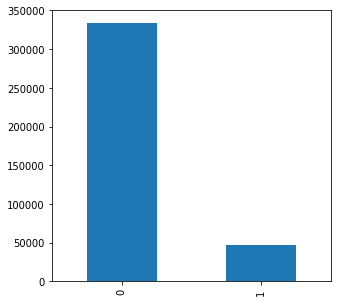

In [90]:
# Checking the Target Variable
df['Response'].value_counts().plot(kind='bar')

In [91]:
# getting the counts of each customer
for cols in df.columns:
    print('------------------------------------')
    print(df[cols].value_counts())

------------------------------------
2047      1
295621    1
84604     1
82557     1
88702     1
         ..
107934    1
109983    1
21920     1
23969     1
2049      1
Name: id, Length: 381109, dtype: int64
------------------------------------
Male      206089
Female    175020
Name: Gender, dtype: int64
------------------------------------
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64
------------------------------------
1    380297
0       812
Name: Driving_License, dtype: int64
------------------------------------
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       

In [93]:
print('we have {} rows in our dataset'.format(df.shape[0]))
print('we have {} columns in our dataset'.format(df.shape[1]))

we have 381109 rows in our dataset
we have 12 columns in our dataset


In [94]:
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [9]:
df.select_dtypes('O').columns.tolist()

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [10]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [11]:
features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License', 'Previously_Insured']

In [12]:
# Counts on categorical columns
for feature in features:
    print(feature,':')
    print(df[feature].value_counts())
    print('----------------------------')

Gender :
Male      206089
Female    175020
Name: Gender, dtype: int64
----------------------------
Vehicle_Age :
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
----------------------------
Vehicle_Damage :
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
----------------------------
Driving_License :
1    380297
0       812
Name: Driving_License, dtype: int64
----------------------------
Previously_Insured :
0    206481
1    174628
Name: Previously_Insured, dtype: int64
----------------------------


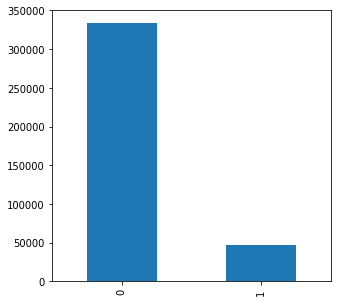

In [13]:
df['Response'].value_counts().plot(kind='bar')

# EDA

In [14]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

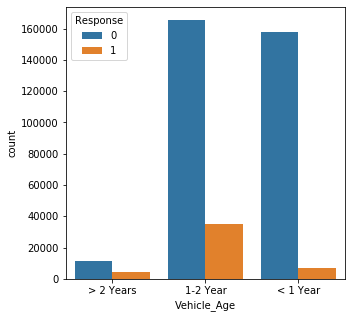

In [15]:
sns.countplot(x='Vehicle_Age', hue='Response', data=df)

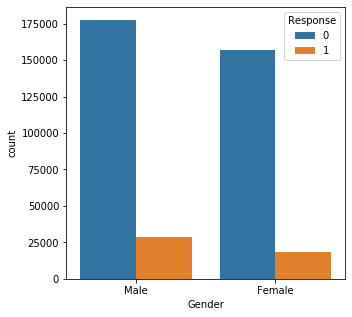

In [16]:
sns.countplot(x='Gender', hue='Response', data=df)

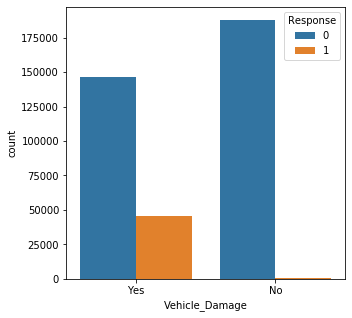

In [17]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)

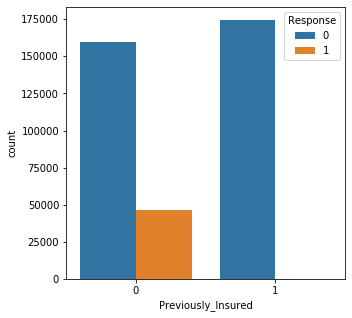

In [18]:
sns.countplot(x='Previously_Insured', hue='Response', data=df)

In [19]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

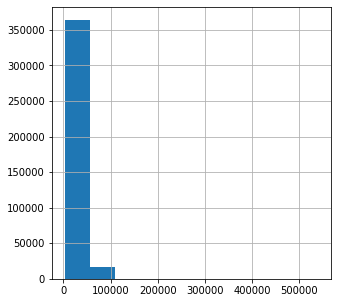

In [20]:
df['Annual_Premium'].hist()

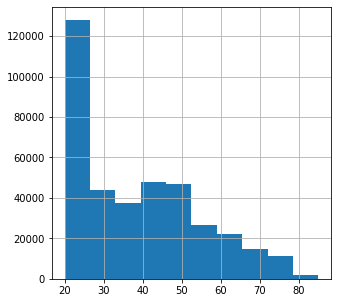

In [21]:
df['Age'].hist()

In [22]:
df['Age'].nunique()

66

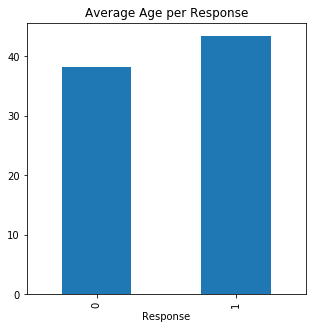

In [23]:
plt.title('Average Age per Response')
df.groupby('Response')['Age'].mean().plot(kind='bar')

Shows we have older age fall into Response

In [24]:
# checking for age greater the avergage
df[df['Age'] >= 44]['Response'].value_counts(normalize=True)

0    0.837076
1    0.162924
Name: Response, dtype: float64

In [25]:
# Total Response Percentage of the full data
df['Response'].value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

In [26]:
# checking for age less the avergage
df[df['Age'] < 44]['Response'].value_counts(normalize=True)

0    0.900953
1    0.099047
Name: Response, dtype: float64

The Main Goal is to have less response

In [27]:
df[df['Age'] >= 44]['Vehicle_Age'].value_counts(normalize=True)

1-2 Year     0.899334
> 2 Years    0.096982
< 1 Year     0.003685
Name: Vehicle_Age, dtype: float64

In [28]:
df[df['Age'] < 44]['Vehicle_Age'].value_counts(normalize=True)

< 1 Year     0.682169
1-2 Year     0.307864
> 2 Years    0.009967
Name: Vehicle_Age, dtype: float64

In [29]:
# Total Response Percentage of the full data
df['Vehicle_Age'].value_counts(normalize=True)

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64

Basically those above the average Age Response Claims more, while those below claims lesser, looking from the data
The Age of the Vehicle are also crucial, we can draw those in lesser Age have more less than a year Vehicle and those in higher age have greater than 1 and greater 2, Age and Vehicle Age seems crucial. we check that during modelling

In [30]:
df.corr()['Response']

id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

In [31]:
# Total Response Percentage of the full data
df['Previously_Insured'].value_counts(normalize=True)

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [32]:
df[df['Age'] >= 44]['Previously_Insured'].value_counts(normalize=True)

0    0.689177
1    0.310823
Name: Previously_Insured, dtype: float64

In [33]:
df[df['Age'] < 44]['Previously_Insured'].value_counts(normalize=True)

1    0.544086
0    0.455914
Name: Previously_Insured, dtype: float64

we can check more and ask the data or business analyst to look more on those factor

In [34]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [3]:
# cleaning the data
# map them
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

# checking the numeric features

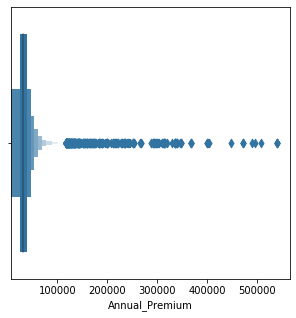

In [36]:
sns.boxenplot(df['Annual_Premium'])

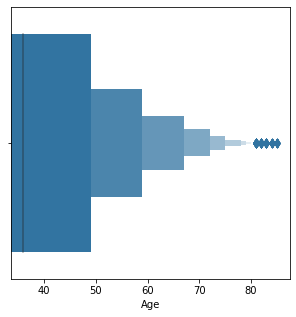

In [37]:
sns.boxenplot(df['Age'])

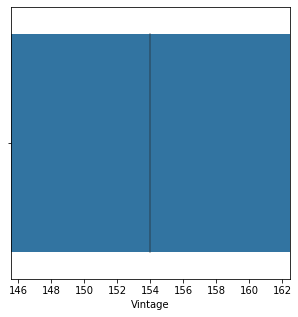

In [38]:
sns.boxenplot(df['Vintage'])

In [39]:
# looking at the age and annual premium correlation
df['Annual_Premium'].corr(df['Age']) * 100

6.750700155669286

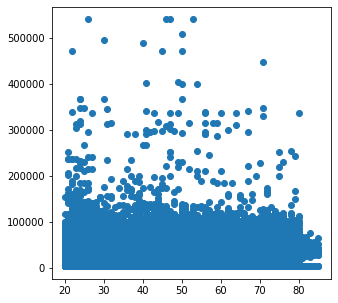

In [40]:
plt.scatter(x='Age', y='Annual_Premium', data=df)

No Serious Correlation from this data, we can determine by country and job title

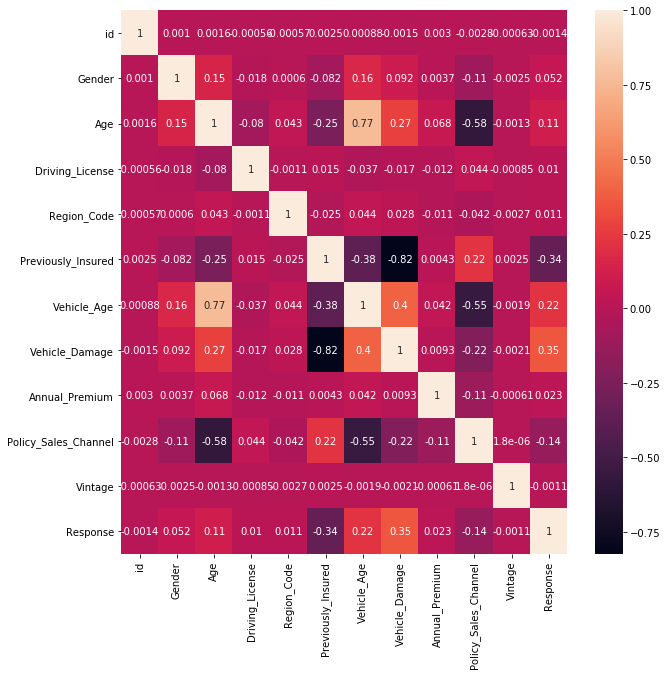

In [5]:
# checking the correlation of the features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# Building a LightGbm Model

why?

Large amount of dataset and lightgbm are super fast and efficient

Using Extreme Gradient Boosting Algorithm for Higher Accuracy and Model Interprebility to make decision

In [6]:
X = df.drop(["Response", 'id'], axis=1)
y = df["Response"]

In [ ]:
X = df.drop(["Response", 'id'], axis=1)
y = df["Response"]
# spliting the data to train and validation set
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,stratify=y)
# shape of the data of train and validation set
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

In [7]:
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,stratify=y)

In [8]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (285831, 10)
Shape of the y_train (285831,)
Shape of the X_test (95278, 10)
Shape of the y_test (95278,)


In [9]:
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = -1
    params["num_leaves"] = 10
    params["min_data_in_leaf"] = 20
    params["learning_rate"] = 0.03
    params["bagging_fraction"] = 0.9
    params["feature_fraction"] = 0.35
    params["feature_fraction_seed"] = 20
    params["bagging_freq"] = 10
    params["bagging_seed"] = 30
    params["'min_child_weight'"] = 0.09
    params["lambda_l1"] = 0.01
    params["verbosity"] = -1

In [ ]:
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = -1
    params["num_leaves"] = 10
    params["min_data_in_leaf"] = 20
    params["learning_rate"] = 0.03
    params["bagging_fraction"] = 0.9
    params["feature_fraction"] = 0.35
    params["feature_fraction_seed"] = 20
    params["bagging_freq"] = 10
    params["bagging_seed"] = 30
    params["'min_child_weight'"] = 0.09
    params["lambda_l1"] = 0.01
    params["verbosity"] = -1
    
from lightgbm import LGBMClassifier # intializing the model
model = LGBMClassifier(**params)

# fitting the model

model.fit(X_train, y_train)

In [10]:
from lightgbm import LGBMClassifier # intializing the model
model = LGBMClassifier(**params)

In [11]:
model.fit(X_train, y_train)

LGBMClassifier("'min_child_weight'"=0.09, bagging_fraction=0.9, bagging_freq=10,
               bagging_seed=30, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.35,
               feature_fraction_seed=20, importance_type='split',
               lambda_l1=0.01, learning_rate=0.03, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=10, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [12]:
def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'Train AUC: {train_auc}, Val Auc: {val_auc}')

In [13]:
model_auc(model)

Train AUC: 0.8549784171587105, Val Auc: 0.853580985613975


In [14]:
y_pred = model.predict_proba(X_test)[:, 1]

In [15]:
print('AUC score of the model is {}'.format(roc_auc_score(y_test, y_pred)))

AUC score of the model is 0.853580985613975


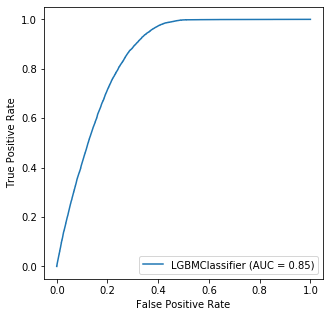

In [16]:
plot_roc_curve(model, X_test, y_test)

# model feature importance

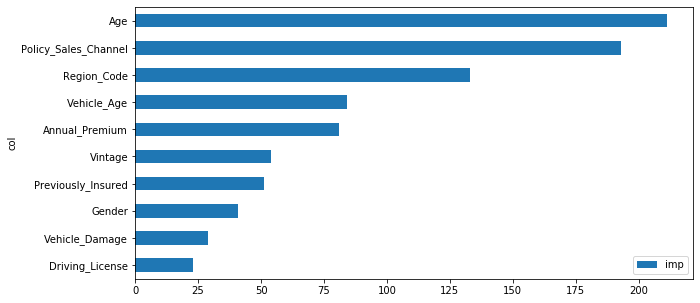

In [17]:
# checking for feature importance
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 5))   

Viewing from our feature importance we can see we have **Age**, **Policy_Sales_Channel**

From the Above plot we see that Age of Respondent, Job_Type, education_level and country contribute a lot to the model.

**A Case with Feature Impotance**

* we don't know where Age of Respondent, Job_Type, education_level are representing either it's class 0 or 1

**Solution**

* Using LIME(Local Interpretable Model-Agnostic Explanations)
* Using SHAP(SHapley Additive exPlanations)

# Lime

* Lime : This is a model agnostic approach, that means it is applicable to any model in order to produce explanations for predictions.

In [18]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

class_names = [0, 1]
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_test.values, class_names=class_names, feature_names = X_test.columns, discretize_continuous = True)

idx=0 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], model.predict_proba, num_features=3, labels=class_names)
explainable_exp.show_in_notebook(show_table=True, show_all=False)

In [19]:
class_names = [0, 1]
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_test.values, class_names=class_names, feature_names = X_test.columns, discretize_continuous = True)

In [20]:
idx=0 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], model.predict_proba, num_features=3, labels=class_names)
explainable_exp.show_in_notebook(show_table=True, show_all=False)

In [21]:
#lets see the actual class for observation 0 versus the classifications our models came up with
actual_val = y_test.iloc[0]
print(f'the actual value is for the class is: {actual_val}')

the actual value is for the class is: 1


In [69]:
idx=5 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], model.predict_proba, num_features=3, labels=class_names)
explainable_exp.show_in_notebook(show_table=True, show_all=False)

In [70]:
#lets see the actual class for observation 3 versus the classifications our models came up with
actual_val = y_test.iloc[3]
print(f'the actual value is for the class is: {actual_val}')

the actual value is for the class is: 0


# Shapely Values

In [71]:
import shap

In [24]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer Expected Value: {expected_value}")

idx = 100 # row selected for fast runtime
select = range(idx)
features = X_test.iloc[select]
feature_display = X.loc[features.index]


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Explainer Expected Value: -2.6648012656592006


# Shap Value Matrix (Number of samples, Number of Features)

In [73]:
pd.DataFrame(shap_values, columns=X.columns).head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0  0.019669  0.208916         0.001365    -0.053997            0.677889   
1 -0.019795  0.100513         0.000759     0.001780           -0.848520   
2  0.019253  0.204500         0.001397     0.011191            0.680637   
3  0.028564  0.252600         0.000907     0.107027            0.668333   
4  0.015303 -0.079408         0.000725    -0.031875           -0.810649   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0     0.053070        0.597719        0.013878              0.228472 -0.002891  
1     0.043006       -0.549345        0.004361              0.153417 -0.001589  
2     0.049324        0.604700       -0.004403              0.230220 -0.003253  
3    -0.054026        0.612157        0.004743             -0.398905  0.002188  
4     0.036672       -0.506262       -0.015161              0.172167 -0.000161

# Summary Plot

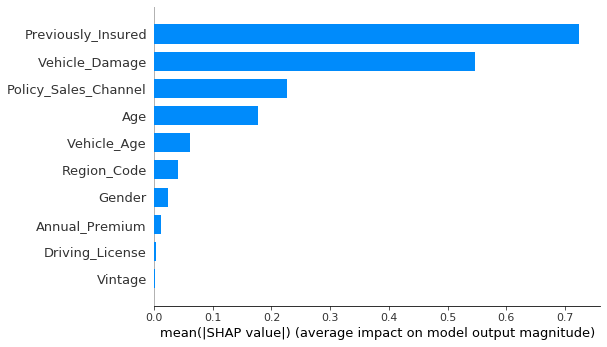

In [74]:
shap.summary_plot(shap_values, feature_display, plot_type='bar')

# Summary Plot

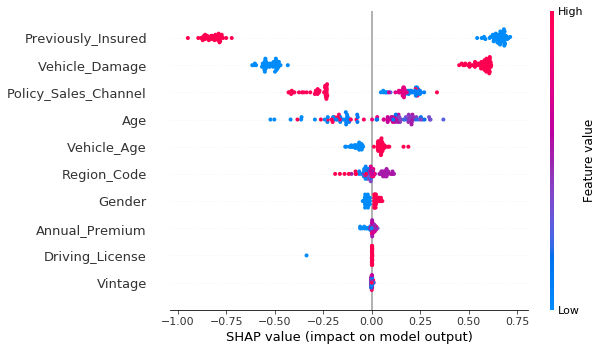

In [75]:
shap.summary_plot(shap_values, features)

# Dependency Plot

**One Way Plot**

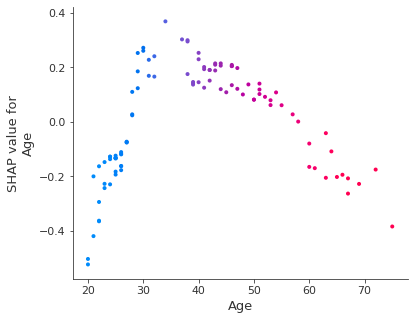

In [77]:
shap.dependence_plot(ind='Age', interaction_index='Age',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

**Two Way Plot**

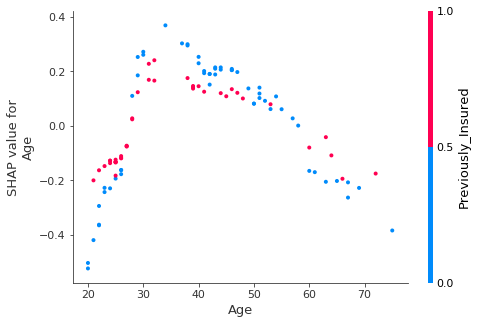

In [79]:
shap.dependence_plot(ind='Age', interaction_index='Previously_Insured',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

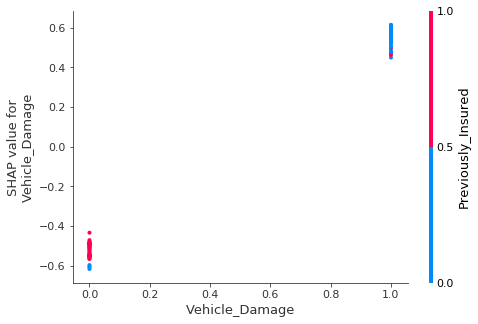

In [81]:
shap.dependence_plot(ind='Vehicle_Damage', interaction_index='Previously_Insured',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

# force plot for individual

In [22]:
shap.initjs() # run to show the plot

In [25]:

shap.force_plot(explainer.expected_value, shap_values=shap_values[0,:], features=feature_display.iloc[0,:])

# force plot on multiple

In [26]:
shap.force_plot(explainer.expected_value, shap_values, feature_display)

# Decision plot

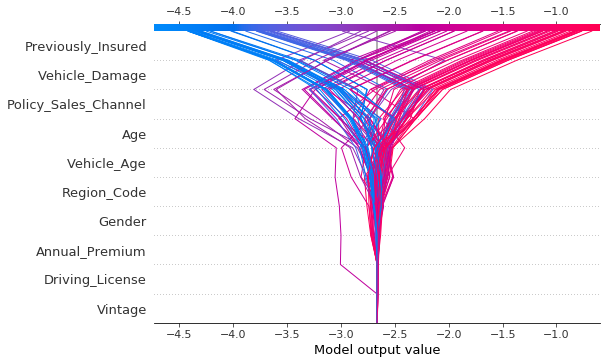

In [86]:
shap.decision_plot(expected_value, shap_values, features)